In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import seaborn as sns
import matplotlib.pyplot as plt

## 1. Problem statement

## 2. Data Gatharing 

In [2]:
dataf = pd.read_csv("CarPrice_Assignment.csv")
dataf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataf.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_ID,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls,audi fox,audi 100ls,audi 5000,audi 4000,audi 5000s (diesel),...,volvo 144ea,volvo 244dl,volvo 245,volvo 264gl,volvo diesel,volvo 145e (sw),volvo 144ea,volvo 244dl,volvo 246,volvo 264gl
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doornumber,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [4]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## 3. EDA (Exploratory Data Analysis)

In [5]:
dataf.dtypes[dataf.dtypes == object].size

10

In [6]:
dataf["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [7]:
dataf["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [8]:
dataf["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [9]:
dataf["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [10]:
dataf["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [11]:
dataf["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [12]:
dataf["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [13]:
dataf["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [14]:
dataf.dtypes[dataf.dtypes == object]

CarName           object
fueltype          object
aspiration        object
doornumber        object
carbody           object
drivewheel        object
enginelocation    object
enginetype        object
cylindernumber    object
fuelsystem        object
dtype: object

In [15]:
cols = dataf.dtypes[dataf.dtypes == object]
col = pd.DataFrame(cols)
col.T.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [16]:
dataf.drop(col.T.columns, axis=1, inplace=True)

In [17]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [18]:
dataf.dtypes[dataf.dtypes == float]

wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
boreratio           float64
stroke              float64
compressionratio    float64
price               float64
dtype: object

In [19]:
dataf.drop("car_ID", axis=1, inplace=True)

In [20]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


In [21]:
dataf.drop("symboling", axis=1, inplace=True)

### 1. Check for linearity
##### Cofficienent of corelations

In [22]:
dataf.corr().tail(1)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
price,0.577816,0.68292,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.0


<AxesSubplot:>

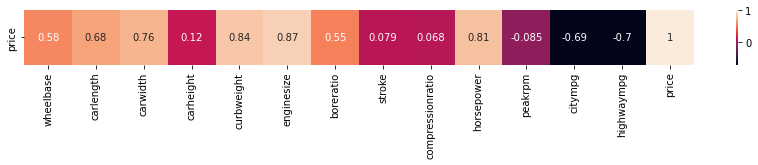

In [23]:
plt.figure(figsize=(15,1))
sns.heatmap(dataf.corr().tail(1), annot=True)

<Figure size 720x360 with 0 Axes>

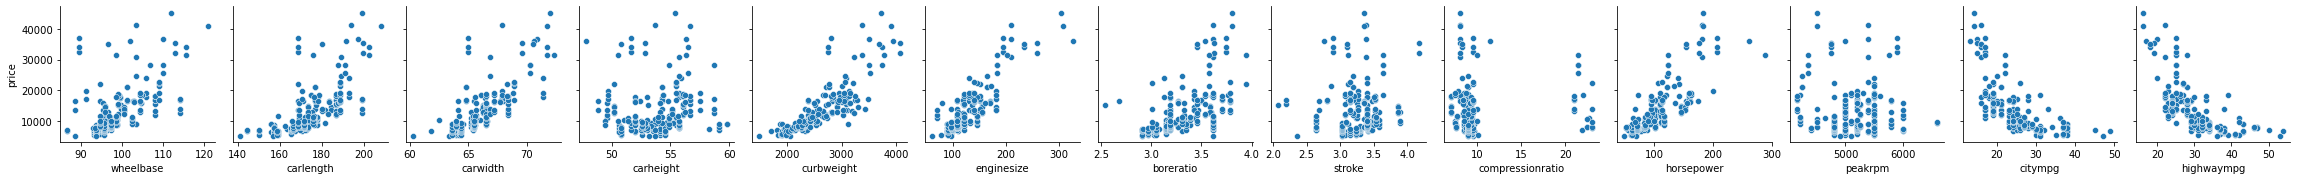

In [24]:
plt.figure(figsize=(10,5))
sns.pairplot(dataf,x_vars=dataf.columns[0:-1], y_vars=dataf.columns[-1] ,kind="scatter")

### Check For MultiColinearity

In [25]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [26]:
dataf.shape

(205, 14)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []

for i in range(dataf.shape[1]-1):
    vf = variance_inflation_factor(dataf.to_numpy(), i)
    vif.append(vf)
    
print(vif)

[1938.4922981503123, 1919.944366648425, 2352.7667135297074, 917.2057364271027, 408.2043587176712, 92.98483215681523, 295.52746646247834, 139.0042323659415, 17.215597443828944, 66.92104018094702, 225.66034935798166, 438.3782724168469, 511.00031334925933]


In [28]:
for i in range(dataf.shape[-1]-1):
    print(dataf.columns[i], vif[i])

wheelbase 1938.4922981503123
carlength 1919.944366648425
carwidth 2352.7667135297074
carheight 917.2057364271027
curbweight 408.2043587176712
enginesize 92.98483215681523
boreratio 295.52746646247834
stroke 139.0042323659415
compressionratio 17.215597443828944
horsepower 66.92104018094702
peakrpm 225.66034935798166
citympg 438.3782724168469
highwaympg 511.00031334925933


<AxesSubplot:title={'center':'Variance inflation Factor'}>

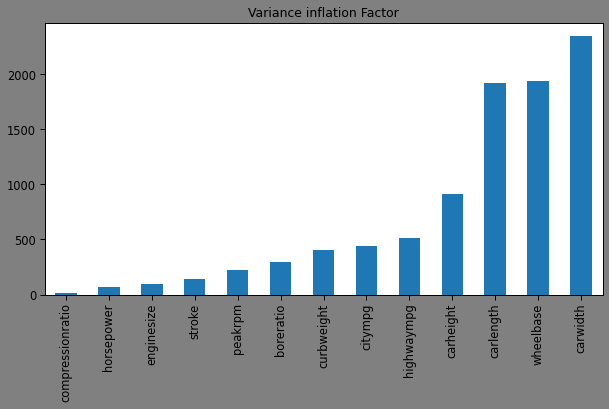

In [29]:
mulitcol = pd.Series(vif, dataf.columns[:-1])
plt.figure(figsize=(10,5), facecolor="gray")
sns.set_context(context="paper", font_scale=1.3)
plt.title("Variance inflation Factor")
mulitcol.sort_values().plot(kind="bar")

## 4. Feature Engineering

## 5. Feature Selection

## 6. Model Training

In [30]:
X = dataf.drop("price", axis=1)
y = dataf["price"]

In [31]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

### Ridge Regression

In [32]:
model_rd = Ridge()

hyperparameter = {"alpha": np.arange(0.01, 10, 0.01)}

Gscv = GridSearchCV(model_rd, hyperparameter, cv=5)
Gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34, 9.35,
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99])})

In [33]:
Gscv.best_estimator_

Ridge(alpha=2.5799999999999996)

In [34]:
Gscv.best_params_

{'alpha': 2.5799999999999996}

In [35]:
Model_rd = Ridge(alpha=2.579)
Model_rd.fit(X_train, y_train)

Ridge(alpha=2.579)

In [36]:
y_pred_te = Model_rd.predict(x_test)
y_pred_tr = Model_rd.predict(X_train)

In [37]:
y_pred_te[:5]

array([7602.7003634 , 5568.96801175, 6672.5004128 , 5454.71200522,
       7592.1330887 ])

In [38]:
y_test[:5]

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
Name: price, dtype: float64

In [39]:
y_pred_tr[:5]

array([22377.09441293,  6983.64443062, 11033.12173206, 10236.81544879,
        6201.18496318])

In [40]:
y_train[:5]

106    18399.0
90      7099.0
147    10198.0
185     8195.0
95      7799.0
Name: price, dtype: float64

### Check Homoscedasticity

Text(0.5, 1.0, 'Homoscedastisity')

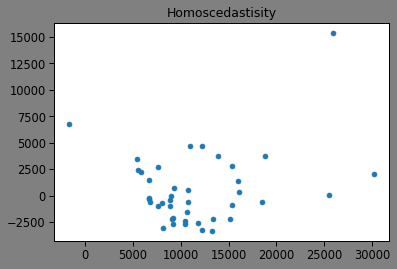

In [41]:
## For test
resi = y_test - y_pred_te

plt.figure(facecolor="gray")
plt.scatter(y_pred_te, resi)
plt.title("Homoscedastisity")

In [42]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(resi)

2.223306068877779

Text(0.5, 1.0, 'Homoscedastisity')

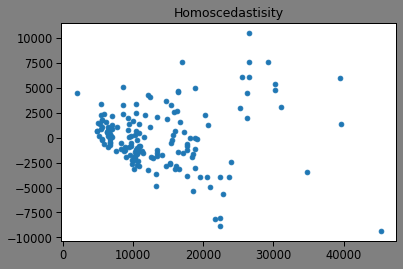

In [43]:
## For train
resi_tr = y_train - y_pred_tr

plt.figure(facecolor="gray")
plt.scatter(y_pred_tr, resi_tr)
plt.title("Homoscedastisity")

In [44]:
durbin_watson(resi_tr)

2.115371503903327

In [45]:
## for test
MSE = mean_squared_error(y_test, y_pred_te)
print(f"Mean Squared Error :- {MSE}")

MAE = mean_absolute_error(y_test, y_pred_te)
print(f"Mean Absolut Error :- {MAE}")

RMSE = np.sqrt(MSE)
print(f"Root Mean Squared Error :- {RMSE}")

R2_score = r2_score(y_test, y_pred_te)
print(f"R2_score :- {R2_score}")

Mean Squared Error :- 11876888.579087134
Mean Absolut Error :- 2339.2161282480897
Root Mean Squared Error :- 3446.286200983188
R2_score :- 0.7838621547914341


In [46]:
## for train
MSE = mean_squared_error(y_train, y_pred_tr)
print(f"Mean Squared Error :- {MSE}")

MAE = mean_absolute_error(y_train, y_pred_tr)
print(f"Mean Absolut Error :- {MAE}")

RMSE = np.sqrt(MSE)
print(f"Root Mean Squared Error :- {RMSE}")

R2_score = r2_score(y_train, y_pred_tr)
print(f"R2_score :- {R2_score}")

Mean Squared Error :- 9212827.13308211
Mean Absolut Error :- 2259.897386827972
Root Mean Squared Error :- 3035.263931371061
R2_score :- 0.8588109214036047


In [47]:
Model_rd.score(X_train, y_train)

0.8588109214036047

In [48]:
Model_rd.score(x_test, y_test)

0.7838621547914341

In [49]:
dataf.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [50]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [51]:
dataf.dtypes[dataf.dtypes == "float64"]

wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
boreratio           float64
stroke              float64
compressionratio    float64
price               float64
dtype: object

In [52]:
for i,j in np.ndenumerate(dataf.columns):   
    if dataf[j].dtypes == "int64":
        dataf[j] = dataf[j].astype("float64")
        
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    float64
 5   enginesize        205 non-null    float64
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    float64
 10  peakrpm           205 non-null    float64
 11  citympg           205 non-null    float64
 12  highwaympg        205 non-null    float64
 13  price             205 non-null    float64
dtypes: float64(14)
memory usage: 22.5 KB


In [53]:
colum = dataf.columns[:-1].tolist()

In [54]:
dataf.head(1)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0


In [55]:
len(colum)

13

In [56]:
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13 = colum

In [57]:
def Pre(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13):
    pred = Model_rd.predict([[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13]])
    predict = pred[0]
    return predict
Pre(88.6, 168.8, 64.1, 48.8, 2548.0, 130.0, 3.47, 2.68, 9.0, 111.0, 5000.0, 21.0, 27.0)

c:\Users\yashd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


12385.91330494103

In [58]:
# def Predict(wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio,horsepower, peakrpm, citympg, highwaympg):
#     pred = Model_rd.predict([[wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio,horsepower, peakrpm, citympg, highwaympg]])
#     predict = pred[0]
#     return predict

# Predict(88.6, 168.8, 64.1, 48.8, 2548.0, 130.0, 3.47, 2.68, 9.0, 111.0, 5000.0, 21.0, 27.0)

In [59]:
import pickle
import os
Model_path_folder = "model"
if not os.path.exists(Model_path_folder):
    os.mkdir(Model_path_folder)
    
pickle.dump(Model_rd,open(f"{Model_path_folder}/model.pkl", "wb"))